In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
digits = load_digits()
X = digits.data  
y = digits.target
print(f"Original shape: {X.shape}")  # (1797, 64)


Original shape: (1797, 64)


In [4]:
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X)
pca_90 = PCA(0.90) 
X_pca_90 = pca_90.fit_transform(X)

In [5]:
print(f"PCA (10 components) shape: {X_pca_10.shape}")
print(f"PCA (90% variance) shape: {X_pca_90.shape}")

PCA (10 components) shape: (1797, 10)
PCA (90% variance) shape: (1797, 21)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca_10, test_size=0.3, random_state=42)
print(X_train, X_test, y_train, y_test )
print(X_pca_train, X_pca_test)

[[ 0.  0.  5. ... 10.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  5. ... 16. 11.  2.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]] [[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  5. ...  4.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  1. ... 16.  9.  0.]] [8 7 1 ... 2 7 1] [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 

In [13]:
svc_original = SVC()
svc_original.fit(X_train, y_train)
y_pred_original = svc_original.predict(X_test)
print("y_pred_original:",y_pred_original)

y_pred_original: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 9 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9

In [14]:
svc_pca = SVC()
svc_pca.fit(X_pca_train, y_train)
y_pred_pca = svc_pca.predict(X_pca_test)
print("y_pred_pca:",y_pred_pca)

y_pred_pca: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 0 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 4 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 

In [18]:
acc_original = accuracy_score(y_test, y_pred_original)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("acc_original :",acc_original )
print("acc_pcs:",acc_pca)

acc_original : 0.987037037037037
acc_pcs: 0.9888888888888889


In [20]:
cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca = confusion_matrix(y_test, y_pred_pca)
print("cm_original :",cm_original )
print("cm_pca :",cm_pca )

cm_original : [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  1  0  0  0  1  1 56]]
cm_pca : [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 65  0  0  0  0]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  1  0 57]]


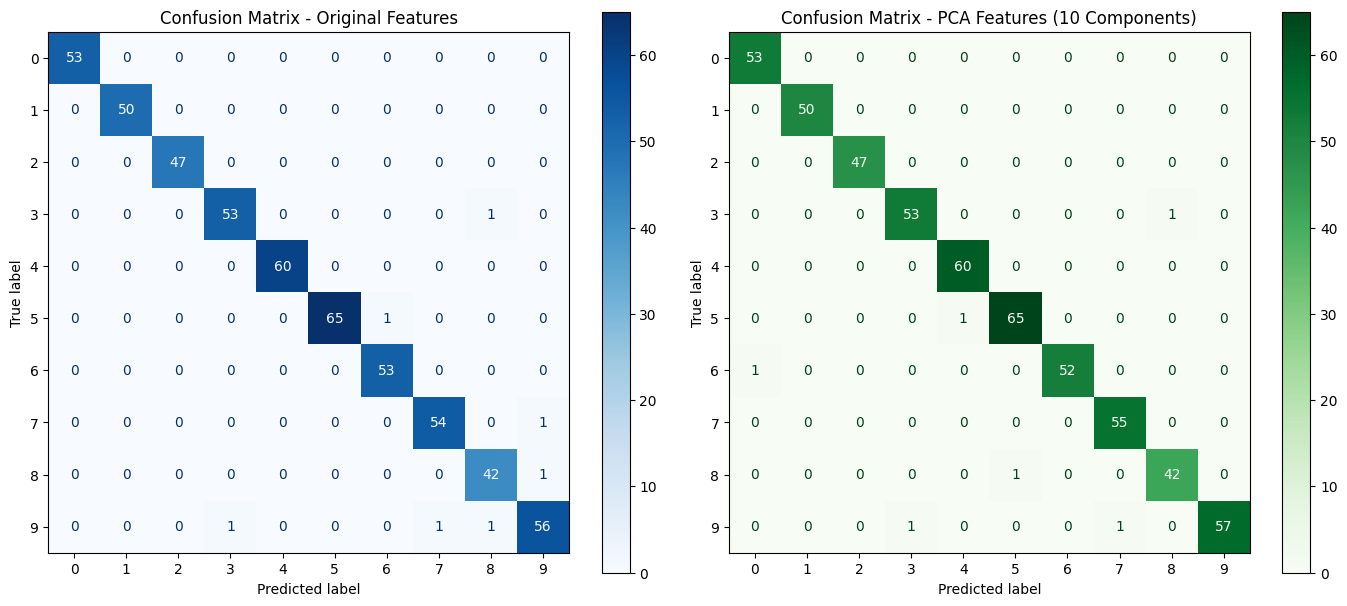

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(cm_original).plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Confusion Matrix - Original Features")
ConfusionMatrixDisplay(cm_pca).plot(ax=axs[1], cmap='Greens')
axs[1].set_title("Confusion Matrix - PCA Features (10 Components)")
plt.tight_layout()
plt.show()

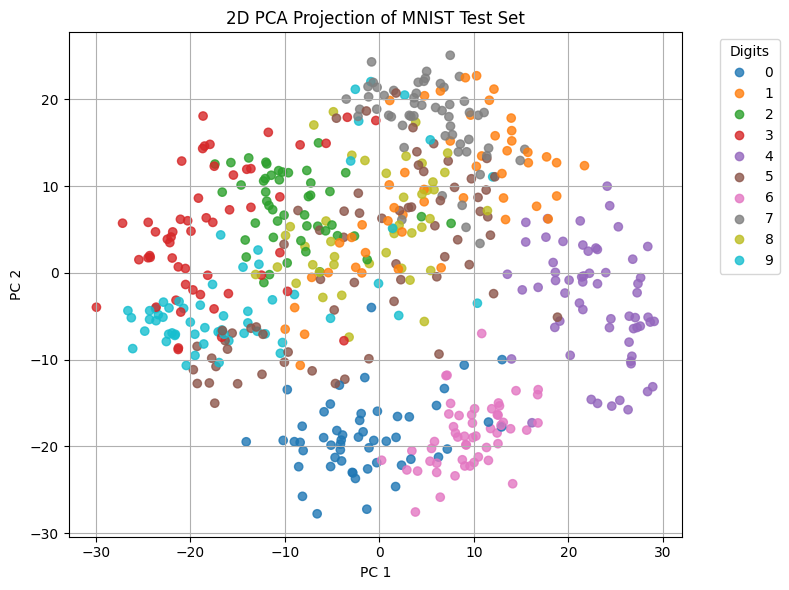

In [23]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='tab10', alpha=0.8)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D PCA Projection of MNIST Test Set")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
print("\n--- PCA Impact Analysis ---")
print("Using PCA with only 10 components significantly reduces feature dimensionality from 64 to 10.")
print(f"Original SVM Accuracy: {acc_original:.4f} | PCA SVM Accuracy: {acc_pca:.4f}")
print("Although there's a slight drop in accuracy, the computational cost and training time are greatly reduced.")
print("PCA also helps visualize high-dimensional data in 2D while preserving class structure.")



--- PCA Impact Analysis ---
Using PCA with only 10 components significantly reduces feature dimensionality from 64 to 10.
Original SVM Accuracy: 0.9870 | PCA SVM Accuracy: 0.9889
Although there's a slight drop in accuracy, the computational cost and training time are greatly reduced.
PCA also helps visualize high-dimensional data in 2D while preserving class structure.
